### All imports in one place

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Loading the dataset file downloaded from kaggle.com

In [6]:
dataset = pd.read_csv('corpora/dataset.csv')

### Visualizing dataset

G:\DW Project\dw-env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

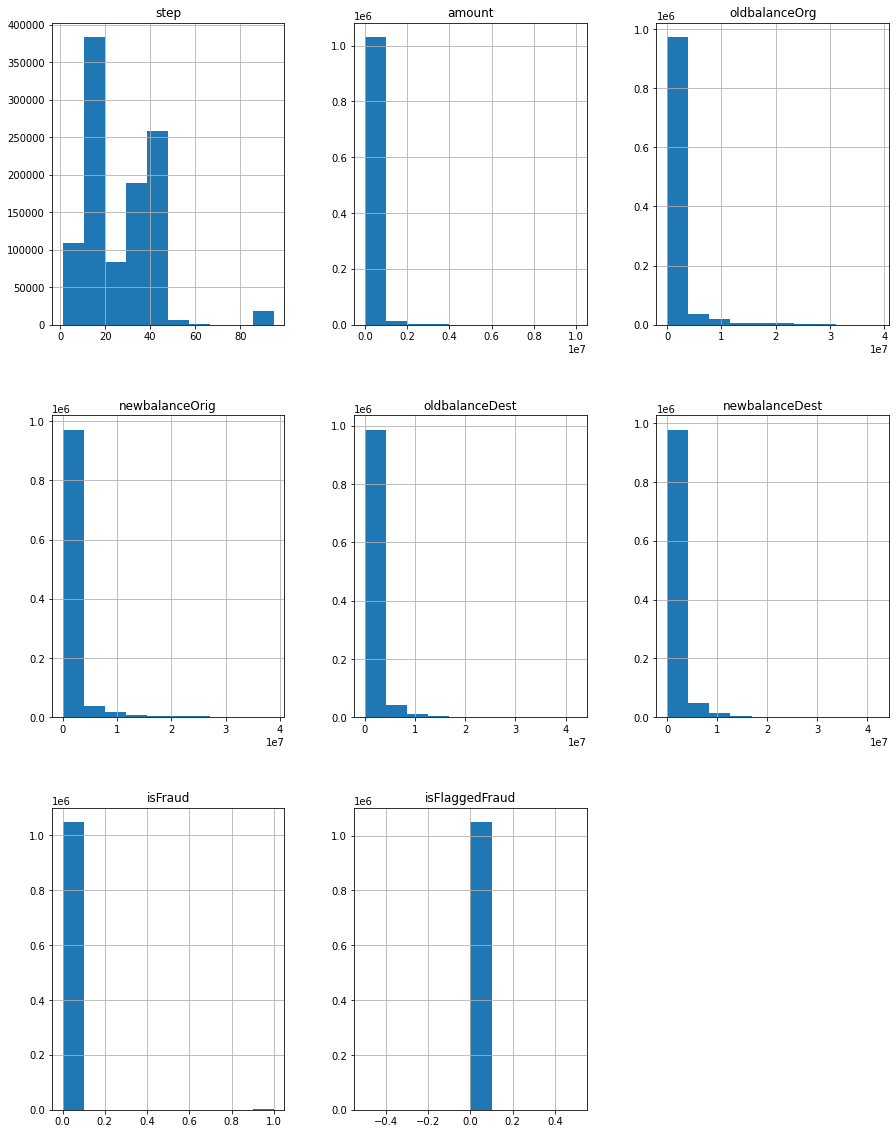

In [9]:
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
dataset.hist(ax=ax)

### Extracting a small chunk of the entire dataset

Since the working with the complete dataset takes too much time on our machine

In [19]:
count = 0
reducedDataset = pd.DataFrame({
    'step': [],
    'type': [],
    'amount': [],
    'nameOrig': [],
    'oldbalanceOrg': [],
    'newbalanceOrig': [],
    'nameDest': [],
    'oldbalanceDest': [],
    'newbalanceDest': [],
    'isFraud': [],
    'isFlaggedFraud': []
})

for i in dataset.index:
    if dataset.at[i, 'isFraud'] == 1:
        reducedDataset = reducedDataset.append({
            'step': dataset.at[i, 'step'],
            'type': dataset.at[i, 'type'],
            'amount': dataset.at[i, 'amount'],
            'nameOrig': dataset.at[i, 'nameOrig'],
            'oldbalanceOrg': dataset.at[i, 'oldbalanceOrg'],
            'newbalanceOrig': dataset.at[i, 'newbalanceOrig'],
            'nameDest': dataset.at[i, 'nameDest'],
            'oldbalanceDest': dataset.at[i, 'oldbalanceDest'],
            'newbalanceDest': dataset.at[i, 'newbalanceDest'],
            'isFraud': dataset.at[i, 'isFraud'],
            'isFlaggedFraud': dataset.at[i, 'isFlaggedFraud'],
        }, ignore_index=True)
    elif dataset.at[i, 'isFraud'] == 0:
        if count == 20000:
            continue
        reducedDataset = reducedDataset.append({
            'step': dataset.at[i, 'step'],
            'type': dataset.at[i, 'type'],
            'amount': dataset.at[i, 'amount'],
            'nameOrig': dataset.at[i, 'nameOrig'],
            'oldbalanceOrg': dataset.at[i, 'oldbalanceOrg'],
            'newbalanceOrig': dataset.at[i, 'newbalanceOrig'],
            'nameDest': dataset.at[i, 'nameDest'],
            'oldbalanceDest': dataset.at[i, 'oldbalanceDest'],
            'newbalanceDest': dataset.at[i, 'newbalanceDest'],
            'isFraud': dataset.at[i, 'isFraud'],
            'isFlaggedFraud': dataset.at[i, 'isFlaggedFraud'],
        }, ignore_index=True)
        count += 1

### Removing the isFraud column and moving it into a separate Dataframe

In [20]:
isFraud = reducedDataset['isFraud']
data = { 'isFraud': isFraud }
labels = pd.DataFrame(data)
reducedDataset.drop('isFraud', axis=1, inplace=True)

### Spliting the reduced dataset into two parts (67% for training and 33% for testing)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(reducedDataset, labels, test_size=0.33, random_state=42)

### Saving the training and testing sets into CSV files

In [22]:
x_train.to_csv(r'corpora/x_train.csv', index=False)
y_train.to_csv(r'corpora/y_train.csv', index=False)
x_test.to_csv(r'corpora/x_test.csv', index=False)
y_test.to_csv(r'corpora/y_test.csv', index=False)